In [1]:
import pandas as pd
import numpy as np

<img style="background-color:white;" src = "https://www.gstatic.com/education/formulas2/553212783/en/population_standard_deviation.svg">

### Outlier Detection with Z score
<pre>
Z score this should be between -3 to +3
note : Standard Scalar formula is the same  
z = (x - μ) / σ

where 
        z is the z-score, 
        x is the raw data point, 
        μ is the population mean, 
        and σ is the population standard deviation.

In [2]:
# pip install scikit-learn

In [3]:
# pip install scipy

In [4]:
def my_zscore(x):
    import numpy as np
    x = np.array(x)
    return (x-np.mean(x,axis=0))/np.std(x,axis=0)

In [5]:
data = {
    "math" : [100,89,78,99],
    "science" : [1000000,89,97,79]
}
df = pd.DataFrame(data)

In [6]:

df1 = pd.DataFrame()
# Calculate Z-score for a specific column (e.g., 'col1')
df1['zscore_col1'] = (df['math'] - df['math'].mean()) / df['math'].std(ddof=0) 


# ddof=0 for population standard deviation, ddof=1 for sample standard deviation (default for .std())
# Calculate Z-scores for multiple columns
for col in ['math', 'science']:
    df1[f'zscore_{col}'] = (df[col] - df[col].mean()) / df[col].std(ddof=0)

print(df1)

   zscore_col1  zscore_math  zscore_science
0     0.954815     0.954815        1.732051
1    -0.280828    -0.280828       -0.577349
2    -1.516471    -1.516471       -0.577330
3     0.842484     0.842484       -0.577372


In [7]:
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

sc1 = StandardScaler()
print(sc1.fit_transform(df))
print("----------------")
print(zscore(df))
print("----------------")
print(my_zscore(df))

[[ 0.95481513  1.73205081]
 [-0.28082798 -0.57734873]
 [-1.51647108 -0.57733025]
 [ 0.84248393 -0.57737183]]
----------------
[[ 0.95481513  1.73205081]
 [-0.28082798 -0.57734873]
 [-1.51647108 -0.57733025]
 [ 0.84248393 -0.57737183]]
----------------
[[ 0.95481513  1.73205081]
 [-0.28082798 -0.57734873]
 [-1.51647108 -0.57733025]
 [ 0.84248393 -0.57737183]]


In [8]:
new = sc1.fit_transform(df)

In [9]:
df.shape

(4, 2)

In [10]:
print(df,"\n",new)

   math  science
0   100  1000000
1    89       89
2    78       97
3    99       79 
 [[ 0.95481513  1.73205081]
 [-0.28082798 -0.57734873]
 [-1.51647108 -0.57733025]
 [ 0.84248393 -0.57737183]]


In [11]:
new.shape

(4, 2)

In [12]:
sc1.inverse_transform(new)

array([[1.0e+02, 1.0e+06],
       [8.9e+01, 8.9e+01],
       [7.8e+01, 9.7e+01],
       [9.9e+01, 7.9e+01]])

In [13]:
df = pd.read_csv("data.csv")

df.columns


Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [14]:
df["MSRP"].describe()

count    1.191400e+04
mean     4.059474e+04
std      6.010910e+04
min      2.000000e+03
25%      2.100000e+04
50%      2.999500e+04
75%      4.223125e+04
max      2.065902e+06
Name: MSRP, dtype: float64

In [15]:

df.select_dtypes("int64")

scaled = pd.DataFrame(sc1.fit_transform(df.select_dtypes("int64")))
scaled

,0,1,2,3,4
0,0.081228,-0.071930,-0.081587,1.637604,0.092174
1,0.081228,0.153737,-0.081587,1.637604,0.000919
2,0.081228,0.153737,0.029680,1.637604,-0.070620
3,0.081228,0.153737,-0.192853,1.637604,-0.185416
4,0.081228,0.153737,-0.192853,1.637604,-0.101399
...,...,...,...,...,...
11909,0.213164,-0.410430,-0.415387,-0.936965,0.091924
11910,0.213164,-0.410430,-0.415387,-0.936965,0.267446
11911,0.213164,-0.410430,-0.415387,-0.936965,0.166791
11912,0.345101,-0.410430,-0.415387,-0.936965,0.171783


In [16]:

scaled.columns = df.select_dtypes("int64").columns
scaled


,Year,highway MPG,city mpg,Popularity,MSRP
0,0.081228,-0.071930,-0.081587,1.637604,0.092174
1,0.081228,0.153737,-0.081587,1.637604,0.000919
2,0.081228,0.153737,0.029680,1.637604,-0.070620
3,0.081228,0.153737,-0.192853,1.637604,-0.185416
4,0.081228,0.153737,-0.192853,1.637604,-0.101399
...,...,...,...,...,...
11909,0.213164,-0.410430,-0.415387,-0.936965,0.091924
11910,0.213164,-0.410430,-0.415387,-0.936965,0.267446
11911,0.213164,-0.410430,-0.415387,-0.936965,0.166791
11912,0.345101,-0.410430,-0.415387,-0.936965,0.171783


In [17]:
df.iloc[scaled[(scaled["MSRP"]>3) | (scaled["MSRP"]<-3)].index,]["Engine HP"].unique() 

array([ 442.,  562.,  597.,  485.,  515.,  543.,  631.,  604.,  620.,
        611.,  661.,  532.,  641.,  450.,  500.,  700.,  720.,  750.,
        530.,  605.,  626.,  572.,  567.,  521.,  582.,  600.,  621.,
        420.,  400.,  325.,  563.,  540.,  510.,  550.,  660.,  731.,
        483.,  651.,  616.,  570.,  560.,  610.,  552.,  592.,  505.,
        632.,  670.,  322.,  453.,  470.,  650.,  617.,  583.,  622.,
        460.,  520.,  565.,  568., 1001.,  490.,  624.])

In [18]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [19]:
df["Vehicle Size"].unique()

array(['Compact', 'Midsize', 'Large'], dtype=object)

In [20]:
pd.get_dummies(df["Vehicle Size"])  # one hot encoding

,Compact,Large,Midsize
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
11909,False,False,True
11910,False,False,True
11911,False,False,True
11912,False,False,True


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(df["Make"])

array([ 4,  4,  4, ...,  0,  0, 25], shape=(11914,))

In [22]:
le.inverse_transform([25])

array(['Lincoln'], dtype=object)

In [23]:
sc = StandardScaler()
z_score = sc.fit_transform(df.select_dtypes("int64").drop(["Year","MSRP"],axis=1))

In [24]:
z_score = pd.DataFrame(z_score)
z_score.columns = df.select_dtypes("int64").drop(["Year","MSRP"],axis=1).columns

In [25]:
z_score

,highway MPG,city mpg,Popularity
0,-0.071930,-0.081587,1.637604
1,0.153737,-0.081587,1.637604
2,0.153737,0.029680,1.637604
3,0.153737,-0.192853,1.637604
4,0.153737,-0.192853,1.637604
...,...,...,...
11909,-0.410430,-0.415387,-0.936965
11910,-0.410430,-0.415387,-0.936965
11911,-0.410430,-0.415387,-0.936965
11912,-0.410430,-0.415387,-0.936965


In [26]:
dr = z_score.query("""`highway MPG` > 3 or `highway MPG`< -3 or `city mpg` > 3  or `city mpg` < -3 or `Popularity` > 3 or `Popularity` < -3 """)

In [27]:
dr

,highway MPG,city mpg,Popularity
539,9.180404,11.378876,-0.510413
540,8.616238,11.267609,-0.510413
541,8.616238,11.267609,-0.510413
1119,36.937406,0.474746,1.075111
1202,2.071904,3.367679,0.448808
...,...,...,...
9868,9.293238,12.046475,-0.117847
9869,9.293238,12.046475,-0.117847
9870,9.293238,12.046475,-0.117847
9871,9.293238,12.046475,-0.117847


In [28]:
df.drop(dr.index,inplace=True)

In [29]:
df.shape

(11801, 16)

### Skewness 

#### Data Distribution on x axis 

In [30]:
df["MSRP"].skew()

np.float64(11.737396653905716)

<img src ="https://wallstreetmojo-files.s3.ap-south-1.amazonaws.com/2019/04/Skewness-Formula-1.jpg">

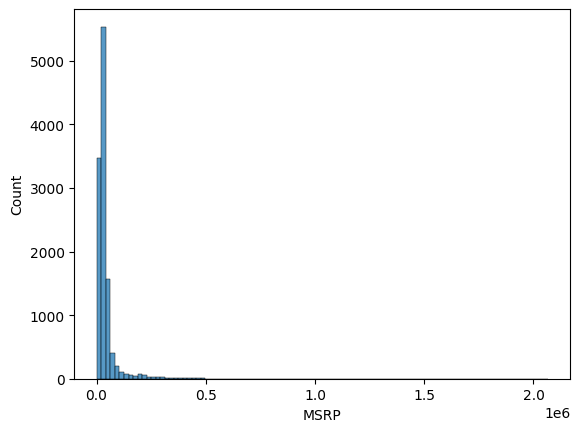

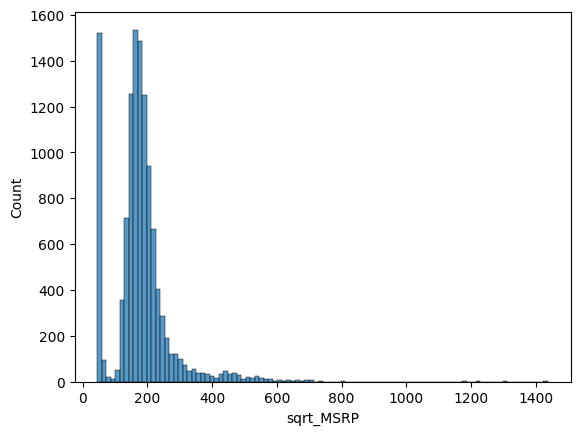

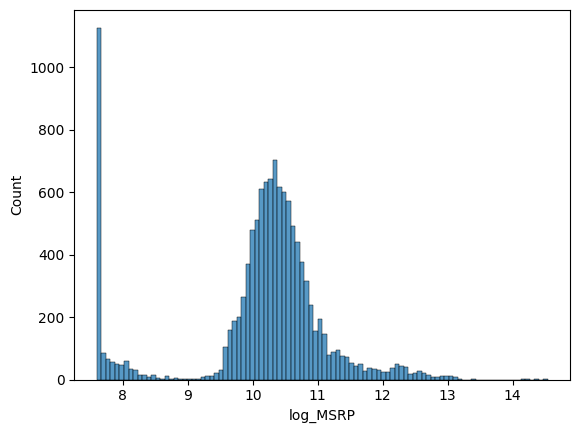

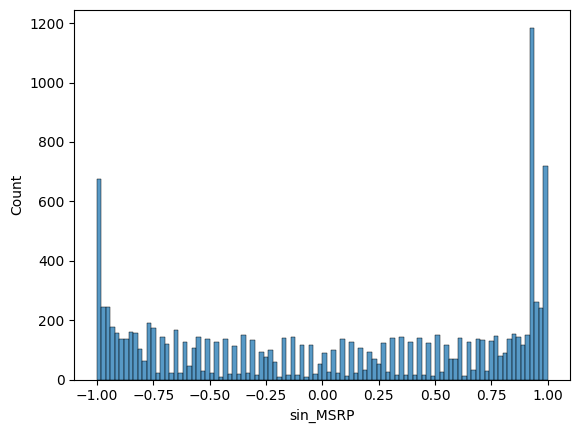

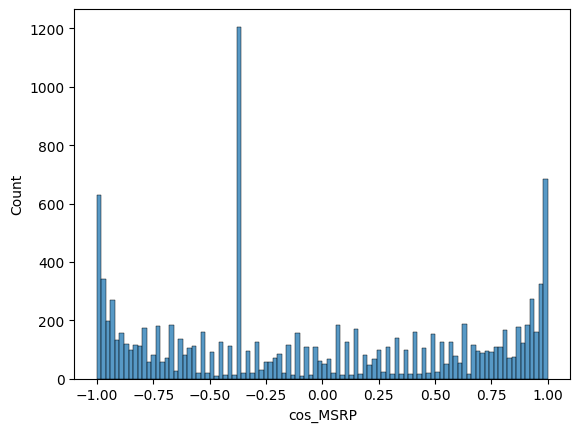

In [37]:
from seaborn import histplot
from matplotlib import pyplot as plt
histplot(df["MSRP"],bins=100)
plt.show()

df["sqrt_MSRP"] = np.sqrt(df["MSRP"])
histplot(df["sqrt_MSRP"],bins=100 )
plt.show()

df["log_MSRP"] = np.log1p(df["MSRP"])
histplot(df["log_MSRP"],bins=100 )
plt.show()

df["sin_MSRP"] = np.sin(df["MSRP"])
histplot(df["sin_MSRP"],bins=100 )
plt.show()

df["cos_MSRP"] = np.cos(df["MSRP"])
histplot(df["cos_MSRP"],bins=100 )
plt.show()

In [36]:
print(df["MSRP"].skew())
print(df["sqrt_MSRP"].skew())
print(df["log_MSRP"].skew())
df["sin_MSRP"] = np.sin(df["MSRP"])
df["cos_MSRP"] = np.cos(df["MSRP"])
print(df["sin_MSRP"].skew())
print(df["cos_MSRP"].skew())

11.737396653905716
2.346758125116574
-0.9100878335539272
-0.1274845138351114
0.12512845471675307


In [35]:
df["Vehicle Size"].value_counts()

Vehicle Size
Compact    4685
Midsize    4357
Large      2759
Name: count, dtype: int64

In [38]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,sqrt_MSRP,log_MSRP,sin_MSRP,cos_MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,214.790596,10.739349,-0.653260,-0.757134
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,201.618452,10.612779,-0.803204,-0.595703
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,190.656760,10.500977,0.979627,-0.200827
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,171.610023,10.290483,0.652187,0.758059
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,185.741756,10.448744,-0.825181,0.564869


In [ ]:
mk = "Luxury,High-Performance"

for tag in list(map(lambda x : x.lower(),mk.split(","))) :
    if tag in ["performance","luxury","high-performance"]:
        print(tag)

print("------------------------------")

for tag in ["performance","luxury","high-performance"]:
    if tag in list(map(lambda x : x.lower(),mk.split(","))):
        print(tag)

luxury
high-performance
------------------------------
luxury
high-performance


In [62]:
df['Market Category'].isna().sum()
df["Market Category"] = df["Market Category"].fillna("Crossover")

In [92]:
result_per = []
result_lux = []
result_hp = []
for mk in df["Market Category"]:                           # Factory Tuner,Luxury,High-Performance            
    p,h,l = 0,0,0
    for tag in ["performance","luxury","high-performance"]:     # performance
        if tag in list(map(lambda x : x.lower(),mk.split(","))):    # 
            if tag=="performance":
                p=1
            if tag == "luxury":
                l=1
            if tag == "high-performance":
                h=1
        
    if l==h==p==0:
        result_per.append(False)
        result_lux.append(False)
        result_hp.append(False)
    if l:
        result_lux.append(True)
    if h:
        result_hp.append(True)
    if p:
        result_per.append(True)
    if not l:
        result_lux.append(False)
    if not h:
        result_hp.append(False)
    if not p:
        result_per.append(False)

    

In [101]:
#second way
result_per = []
result_lux = []
result_hp = []

it = iter(df["Market Category"])

for tag in list(map(lambda x : x.lower(),next(it).split(","))) :
    p,h,l = 0,0,0                          # Factory Tuner,Luxury,High-Performance            
    for tag in ["performance","luxury","high-performance"]:     # performance
            if tag=="performance":
                p=1
            if tag == "luxury":
                l=1
            if tag == "high-performance":
                h=1
        
    if l==h==p==0:
        result_per.append(False)
        result_lux.append(False)
        result_hp.append(False)
    if l:
        result_lux.append(True)
    if h:
        result_hp.append(True)
    if p:
        result_per.append(True)
    if not l:
        result_lux.append(False)
    if not h:
        result_hp.append(False)
    if not p:
        result_per.append(False)

    

In [102]:
print(result_per,result_lux,result_hp)

[True, True, True] [True, True, True] [True, True, True]


In [94]:
df["Market Category Luxury"] = result_lux
df["Market Category High Performance"] = result_hp
df["Market Category Performance"] = result_per

ValueError: Length of values (18582) does not match length of index (11801)